## 0. Basic Packages

In [1]:
import pandas as pd
#Set copy warning to off
pd.set_option('mode.chained_assignment', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nlp_preprocess import *

## 1. Data Wrangling

In [2]:
f1 = pd.read_excel("comments.xlsx", [0])[0]
f2 = pd.read_excel("comments.xlsx", [1])[1]

df = pd.concat([f1, f2]) 
df.rename(columns={"Initial Classification":"Initial_Classification"}, inplace=True)
print(df.shape)
df.head()

(584, 4)


,ID,Area,Comment,Initial_Classification
0,1,Dept 1,Cerrar la brecha entre los que deciden el trab...,Negativo
1,3,Dept 1,"Sobretodo, que se miren las cargas de trabajo ...",Negativo
2,4,Dept 1,1. Dar coaching a algunos Gerentes (que no sab...,Negativo
3,19,Dept 1,s,Negativo
4,29,Dept 1,Mas oportunidades de crecimiento y major salar...,Negativo


### Checking for nulls

In [3]:
#cecking for nulls
df.isna().sum()

ID                         0
Area                       0
Comment                   11
Initial_Classification     0
dtype: int64

In [4]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 291
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      584 non-null    int64 
 1   Area                    584 non-null    object
 2   Comment                 573 non-null    object
 3   Initial_Classification  584 non-null    object
dtypes: int64(1), object(3)
memory usage: 22.8+ KB


In [5]:
#cheking the null comments
df[df.Comment.isna()]

,ID,Area,Comment,Initial_Classification
12,120,Dept 1,NaN,Negativo
48,561,Dept 4,NaN,Negativo
109,1280,Dept 7,NaN,Negativo
129,1475,Dept 9,NaN,Negativo
158,1768,Dept 9,NaN,Negativo
227,2481,Dept 9,NaN,Negativo
240,2587,Dept 9,NaN,Negativo
274,2850,Dept 10,NaN,Negativo
277,2887,Dept 10,NaN,Negativo
227,2481,Dept 9,NaN,Positivo


In [6]:
df.Comment = df.Comment.str.lower()

### Updating nulls with NA

In [7]:
#we will replace with the term "NA"
df.Comment[df.Comment.isna()] = "NA"

## 2. Main Functions

In [8]:
#function to check the number of times each stop word is present in comments column

#if, for instance, I consider, due to the nature of the comments and the times a stop word appears
#in the comments, I'd remove that stop word from "stop_words" list
def count_stop_words(words=np.ndarray, comments=np.ndarray):
    stop_w_count = {} 

    for w in words:
        stop_w_count[w] = sum([c.split().count(w) for c in comments])

    return sorted(stop_w_count.items(), key=lambda t: t[1], reverse=True)

#count_stop_words(stop_words, df.Comment)

## 3. Main

In [9]:
from nltk.corpus import stopwords

#we select the spanish stop words (by default all the words with accents have them)
stop_words = stopwords.words('spanish')

#now we have the words with accents and the same ones without accents
stop_words = add_non_accents(stop_words)

#list to exclude in stop_words (excluded based in "count_stop_words" fn)
stop_w_list = ["no", "mucho", "muchos", "tiene", "tienen", "otras", "sin", "nada", "algo"
               "tanto", "alguna", "estamos", "tengan", "tenemos", "nuestros", "fuera", "algunos", "hasta"]

#exclude previous list of words from stop_words
stop_words.difference_update(stop_w_list)

Select between 'cld3' or 'langdetect' the lang detector you want
Hint: 'cld3' usually offers better results for es comments
cld3


Select 'yes' to remove accents from your df, or 'no' to keep them
yes


Select 'yes' if you want the root (lemma) of your word, input 'no' to keep the original word
no


Select 'yes' if you want to include stop_words, else 'no'
no


Select the vectorizer you want between CountVectorizer / TfidfVectorizer
TfidfVectorizer


Select the range o ngrams you want
(1, 1) for unigrams
(2, 2) for bigrams and so on
You can also mix (1, 3), which will create from unigrams to trigrams
Please, write a comma between them, whithout parenthesis
Like this: 1, 2
3,3
Input the top sentences you want to see in the graph
Input an int number like 10 or 20
40
Select 'df_es' if you want spanish df, if you want english one, select 'df_en'
df_es
Select which set of comments you want, 'positive', or 'negative'
negative


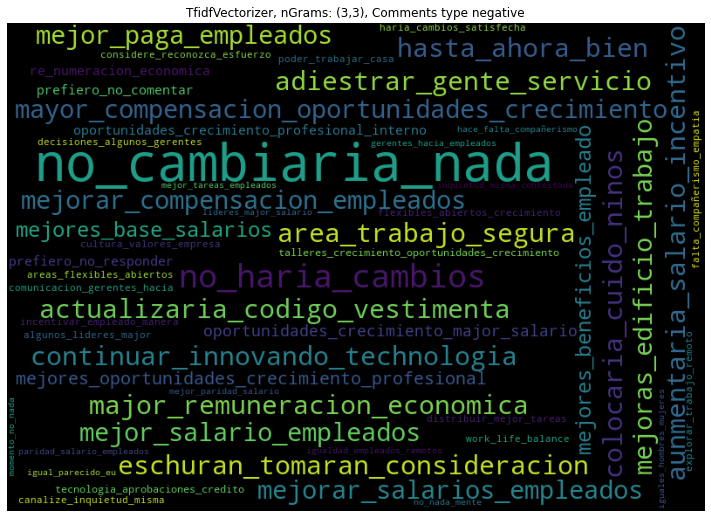

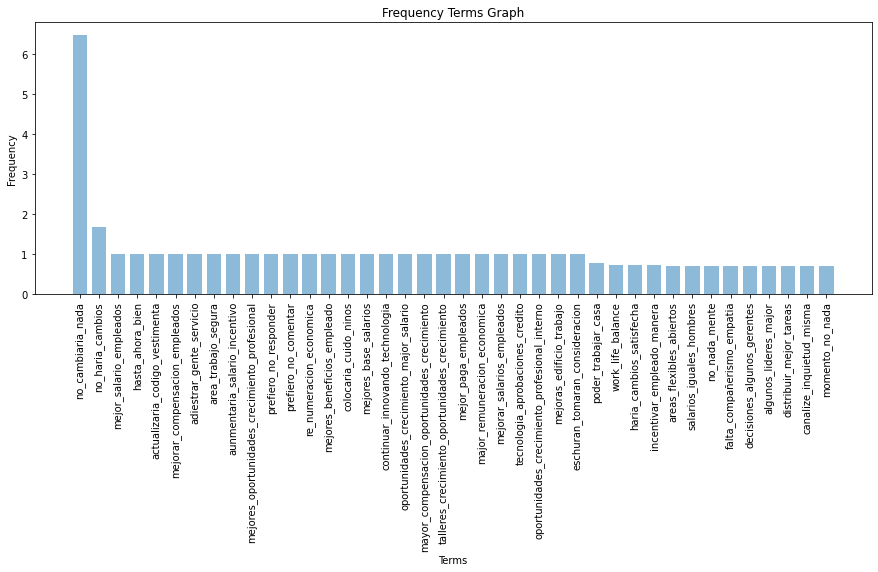

In [11]:
lang_detector = input("Select between 'cld3' or 'langdetect' the lang detector you want\nHint: 'cld3' usually offers better results for es comments\n")
while lang_detector != "cld3" and lang_detector != "langdetect":
    lang_detector = input("Please input 'cld3' or 'langdetect'\n")   
print("\n")

remove_accents = input("Select 'yes' to remove accents from your df, or 'no' to keep them\n")
while remove_accents != "yes" and remove_accents != "no":
    remove_accents = input("Please input 'yes' or 'no'\n")   
print("\n")

word_root = input("Select 'yes' if you want the root (lemma) of your word, input 'no' to keep the original word\n")
while word_root != "yes" and word_root != "no":
    word_root = input("Please input 'yes' or 'no'\n")   
print("\n")

stop_w = input("Select 'yes' if you want to include stop_words, else 'no'\n")
while stop_w != "yes" and stop_w != "no":
    stop_w = input("Please input 'yes' or 'no'\n")   
print("\n")

vectorizer = input("Select the vectorizer you want between CountVectorizer / TfidfVectorizer\n")
while vectorizer != "CountVectorizer" and vectorizer != "TfidfVectorizer":
    vectorizer = input("Please input 'CountVectorizer' or 'TfidfVectorizer'\n")   
print("\n")

ngrams = input("Select the range o ngrams you want\n(1, 1) for unigrams\n(2, 2) for bigrams and so on\nYou can also mix (1, 3), which will create from unigrams to trigrams\nPlease, write a comma between them, whithout parenthesis\nLike this: 1, 2\n")

graph_length = int(input("Input the top sentences you want to see in the graph\nInput an int number like 10 or 20\n"))

def main(df=pd.DataFrame, lang_detector=lang_detector, remove_accents=remove_accents, word_root=word_root, stop_w=stop_w, vectorizer=vectorizer, ngrams=ngrams, graph_length=graph_length):
    #detect language and create column with the lang
    df["language"] = dect_lang(df.Comment, detector=lang_detector)
    #in this specific case, everything != en, will be es
    df.language[df.language!="en"] = "es"
    
    #create df for each lang
    df_es = df[df.language=="es"]
    df_en = df[df.language=="en"]
    
    #select between DFs
    selected_df = input("Select 'df_es' if you want spanish df, if you want english one, select 'df_en'\n")
    
    if selected_df == "df_es":
        neg_comments_es = df_es.Comment.values[df_es.Initial_Classification=="Negativo"]
        pos_comments_es = df_es.Comment.values[df_es.Initial_Classification=="Positivo"]
    elif selected_df == "df_en":
        neg_comments_es = df_en.Comment.values[df_es.Initial_Classification=="Negativo"]
        pos_comments_es = df_en.Comment.values[df_es.Initial_Classification=="Positivo"]
    else:
        raise ValueError("You have to choose between one of the dataframes")
    
    #preprocess to clean comments and divide them in pos / neg
    n_clean_comments_es = preprocess(clean_comments(neg_comments_es, remove_accents=remove_accents), root=word_root, stop_w=stop_w, stop_words=stop_words)
    p_clean_comments_es = preprocess(clean_comments(pos_comments_es, remove_accents=remove_accents), root=word_root, stop_w=stop_w, stop_words=stop_words)
    
    n_flatten_comments_es = [" ".join(comments) for comments in n_clean_comments_es]
    p_flatten_comments_es = [" ".join(comments) for comments in p_clean_comments_es]
    
    #collecting ngrams from the input above
    n1, n2 = int(ngrams.split(",")[0]), int(ngrams.split(",")[1])
    
    #choosing between neg or pos comments
    comments_type = input("Select which set of comments you want, 'positive', or 'negative'\n")
    
    if comments_type == "negative":
        terms, words_df = basic_vectorizer(vectorizer=vectorizer, ngrams_range=(n1,n2), arr=n_flatten_comments_es)
        
        #this runs for CountVectorizer
        if vectorizer == "CountVectorizer":
            make_cloud(vectorizer=None, comments=terms, freq_dict=None, title=f"{vectorizer}, nGrams: ({ngrams}), Comments type negative")
        #this runs for TfidfVectorizer
        else:
            make_cloud(vectorizer="tf-idf", comments=None, freq_dict=terms, title=f"{vectorizer}, nGrams: ({ngrams}), Comments type negative")

        freq_graph(df=words_df, length=graph_length, figsize=(15, 5))
    
    elif comments_type == "positive":
        terms, words_df = basic_vectorizer(vectorizer=vectorizer, ngrams_range=(n1,n2), arr=p_flatten_comments_es)
        
        #this runs for CountVectorizer
        if vectorizer == "CountVectorizer":
            make_cloud(vectorizer=None, comments=terms, freq_dict=None, title=f"{vectorizer}, nGrams: ({ngrams}), Comments type positive")
        #this runs for TfidfVectorizer
        else:
            make_cloud(vectorizer="tf-idf", comments=None, freq_dict=terms, title=f"{vectorizer}, nGrams: ({ngrams}), Comments type positive")

        freq_graph(df=words_df, length=graph_length, figsize=(15, 5))
    
    else:
        raise ValueError("You have to choose between 'negative' or 'positive'")
        
    
if __name__ == "__main__":
    main(df)